In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')
import compression as C
from matplotlib.pyplot import imshow

%matplotlib inline

/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


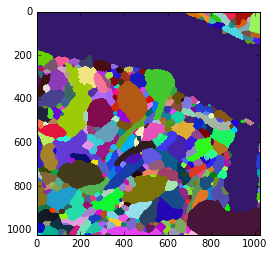

In [2]:
# Load data
data = C.Util.load_data('ac3')
# Fritz only
# data = C.Util.load_data('ac3', -1, '/Volumes/FFRITZ/cs222/ac3/rhoana/')
imshow(C.Util.colorize(data[0]))

In [3]:
# SETUP

# Iterations
N = 5

# DEFAULT --------------------------------------------------
# Compression methods
def_coms = [
    C.BOCKWURST,
    C.LZMA,
    C.ZLIB
]

# Encoding methods
def_encs = [
    C.NE,
    C.NG,
    C.RLE
]

# ALL ------------------------------------------------------
# compression methods
all_coms = [
    C.BOCKWURST,
    # C.BROTLI,
    C.BZ2,
    C.JPEG2000,
    C.LZ78,
    # C.LZF,
    C.LZMA,
    C.LZO,
    C.LZW,
    C.PNG,
    C.X264,
    C.ZLIB,
    # C.ZOPFLI,
    C.ZSTD
]

# encoding methods
all_encs = [
    C.NE,
    C.RLE,
    C.NG,
    C.BOCKWURST
]

# ENCODING ONLY -------------------------------------------
# Compression methods
enc_only_coms = [
    C.NC
]

# encoding methods
enc_only_encs = [
    C.RLE,
    C.NG,
    C.BOCKWURST
]

In [4]:
# RUN: default
results_default = C.Util.run_experiments(data=data, N=N, com_alg=def_coms, enc_alg=def_encs, verbose=True)

> NE + Bockwurst
Compression Method: Bockwurst
Encoding Method: NE
Input Size: 629.1456 MB
Output Size: 0.880576 MB
Ratio: 714.470528381
Total Compression Speed [MB/s]: 50.9927668963
Total Decompression Speed [MB/s]: 28.2514836225
Compression (Only) Speed [MB/s]: 50.9927875894
Decompression (Only) Speed [MB/s]: 28.2514851349
Encoding Speed [MB/s]: 125658471.746
Decoding Speed [MB/s]: 527765581.332

> NE + LZMA
Compression Method: LZMA
Encoding Method: NE
Input Size: 629.1456 MB
Output Size: 2.094988 MB
Ratio: 300.309882443
Total Compression Speed [MB/s]: 8.53416350016
Total Decompression Speed [MB/s]: 529.248429582
Compression (Only) Speed [MB/s]: 8.53416396936
Decompression (Only) Speed [MB/s]: 529.248854171
Encoding Speed [MB/s]: 155225170.98
Decoding Speed [MB/s]: 659706976.666

> Neuroglancer + LZMA
Compression Method: LZMA
Encoding Method: Neuroglancer
Input Size: 629.1456 MB
Output Size: 1.60832 MB
Ratio: 391.181854357
Total Compression Speed [MB/s]: 20.2653331847
Total Decompres

In [5]:
# RUN: all
results_all = C.Util.run_experiments(data=data, N=N, com_alg=all_coms, enc_alg=all_encs, verbose=True)

> NE + Bockwurst
Compression Method: Bockwurst
Encoding Method: NE
Input Size: 629.1456 MB
Output Size: 0.880576 MB
Ratio: 714.470528381
Total Compression Speed [MB/s]: 50.6066812897
Total Decompression Speed [MB/s]: 27.5251113047
Compression (Only) Speed [MB/s]: 50.6066977886
Decompression (Only) Speed [MB/s]: 27.5251124531
Encoding Speed [MB/s]: 155225170.98
Decoding Speed [MB/s]: 659706976.666

> NE + BZip2
Compression Method: BZip2
Encoding Method: NE
Input Size: 629.1456 MB
Output Size: 2.120648 MB
Ratio: 296.676110321
Total Compression Speed [MB/s]: 3.58054855014
Total Decompression Speed [MB/s]: 67.7271505199
Compression (Only) Speed [MB/s]: 3.58054860844
Decompression (Only) Speed [MB/s]: 67.727157473
Encoding Speed [MB/s]: 219902325.555
Decoding Speed [MB/s]: 659706976.666

> RLE + BZip2
Compression Method: BZip2
Encoding Method: RLE
Input Size: 629.1456 MB
Output Size: 2.2182 MB
Ratio: 283.628888288
Total Compression Speed [MB/s]: 112.925546386
Total Decompression Speed [MB/s

In [6]:
# RUN: encoding only
results_enc_only = C.Util.run_experiments(data=data, N=N, com_alg=enc_only_coms, enc_alg=enc_only_encs, verbose=True)

> RLE + NC
Compression Method: NC
Encoding Method: RLE
Input Size: 629.1456 MB
Output Size: 24.38848 MB
Ratio: 25.7968352271
Total Compression Speed [MB/s]: 149.2071971
Total Decompression Speed [MB/s]: 212.212453611
Compression (Only) Speed [MB/s]: 202986762.051
Decompression (Only) Speed [MB/s]: 659706976.666
Encoding Speed [MB/s]: 149.207306776
Decoding Speed [MB/s]: 212.212521875

> Neuroglancer + NC
Compression Method: NC
Encoding Method: Neuroglancer
Input Size: 629.1456 MB
Output Size: 38.102104 MB
Ratio: 16.5120960249
Total Compression Speed [MB/s]: 46.2362038905
Total Decompression Speed [MB/s]: 212.629853008
Compression (Only) Speed [MB/s]: 202986762.051
Decompression (Only) Speed [MB/s]: 659706976.666
Encoding Speed [MB/s]: 46.2362144222
Decoding Speed [MB/s]: 212.62992154

> Bockwurst + NC
Compression Method: NC
Encoding Method: Bockwurst
Input Size: 629.1456 MB
Output Size: 11.01104 MB
Ratio: 57.1377090629
Total Compression Speed [MB/s]: 75.4987255408
Total Decompression S

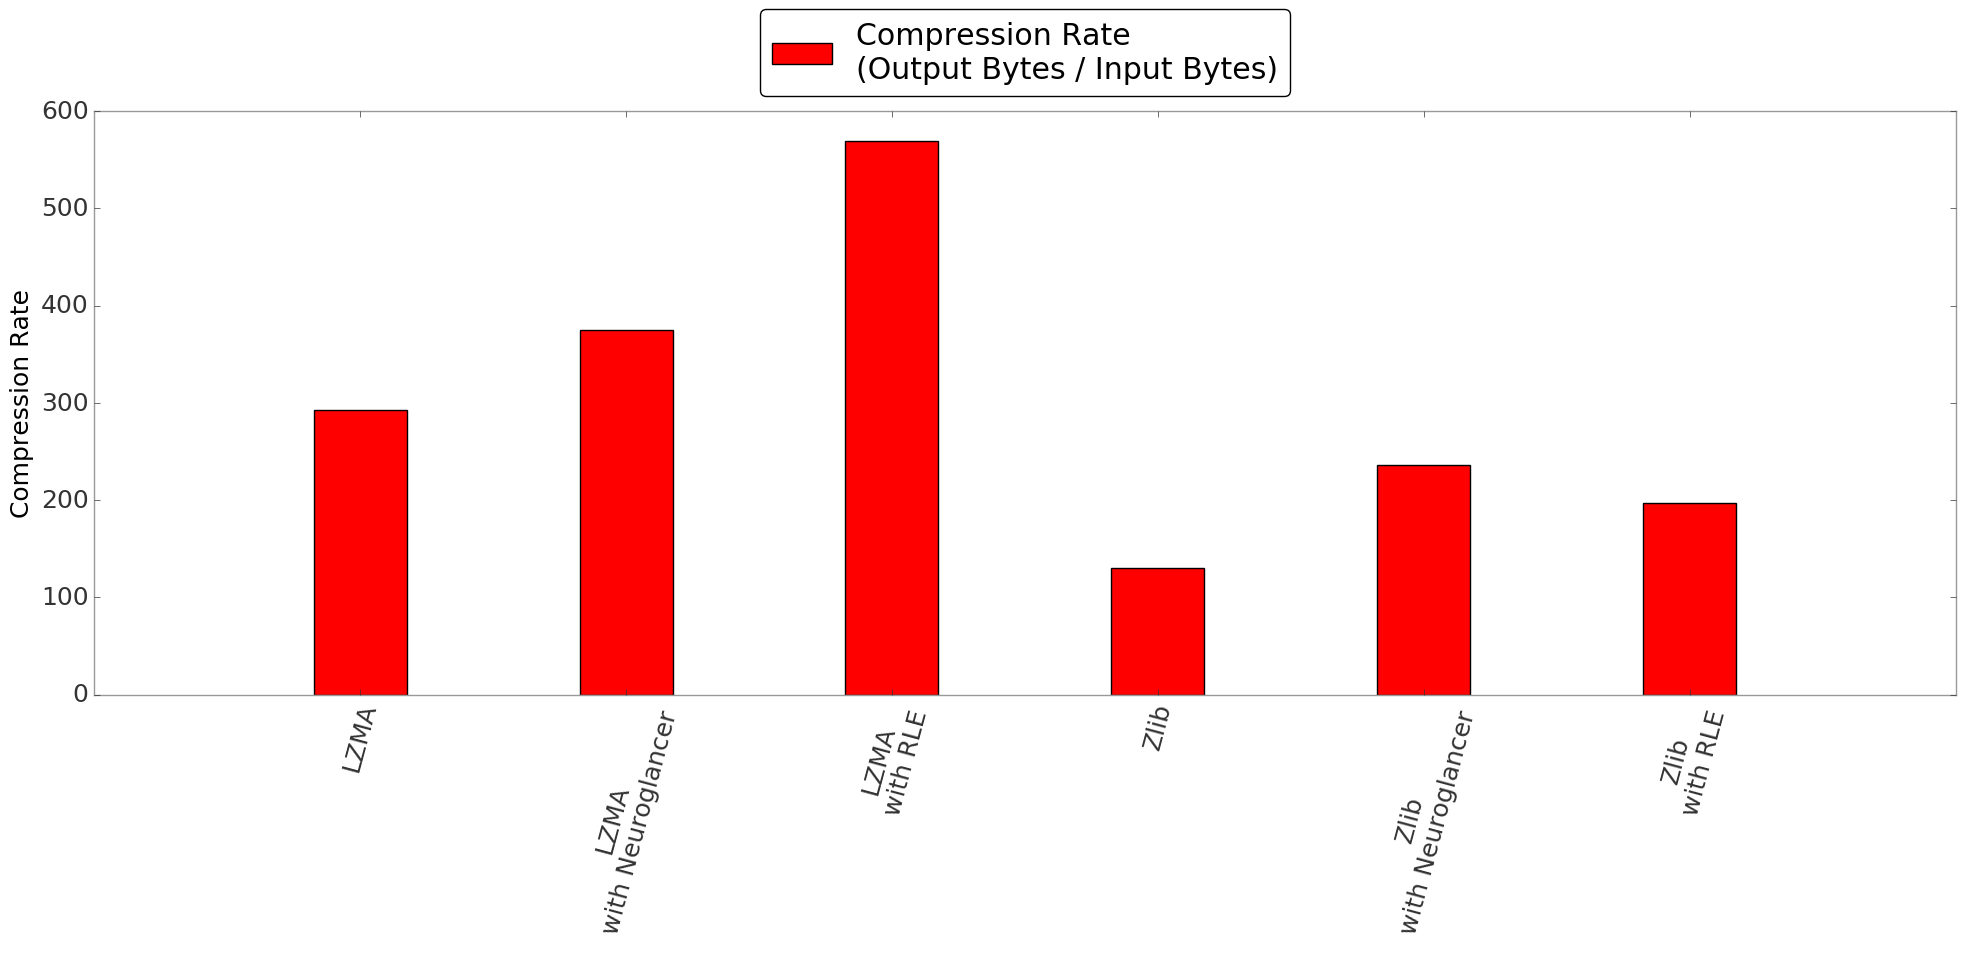

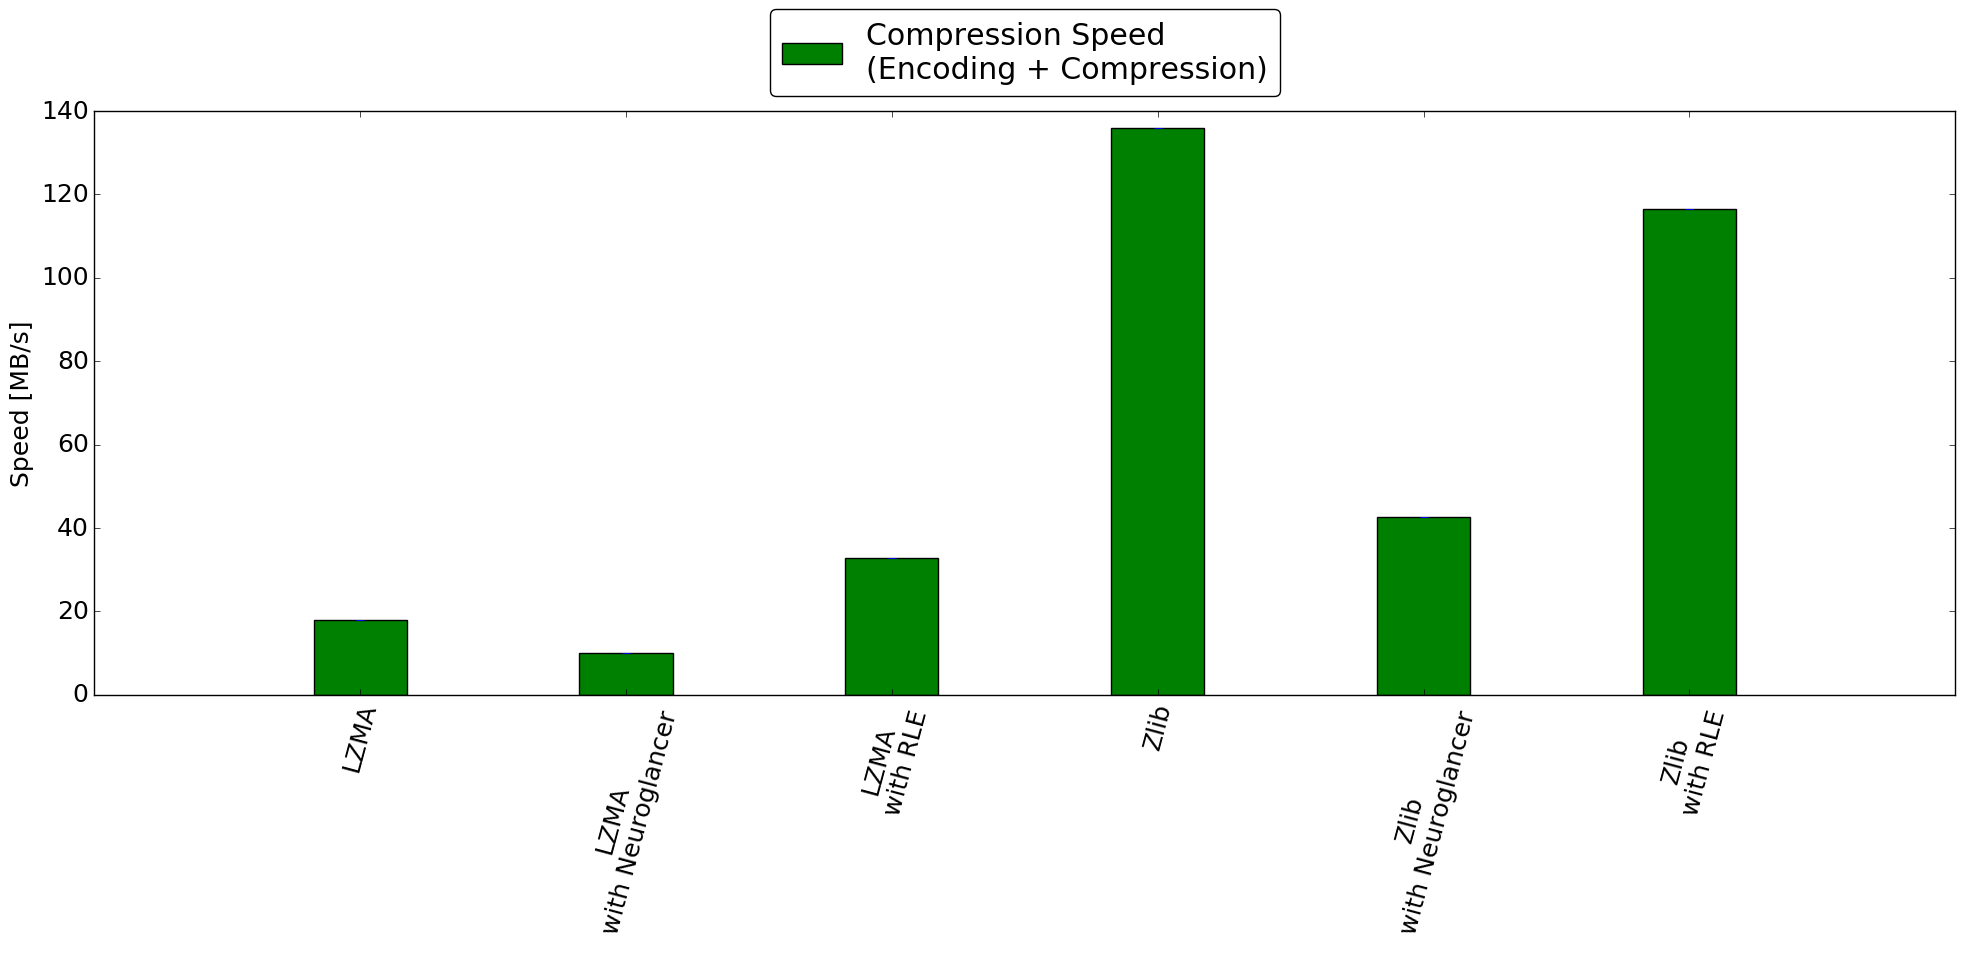

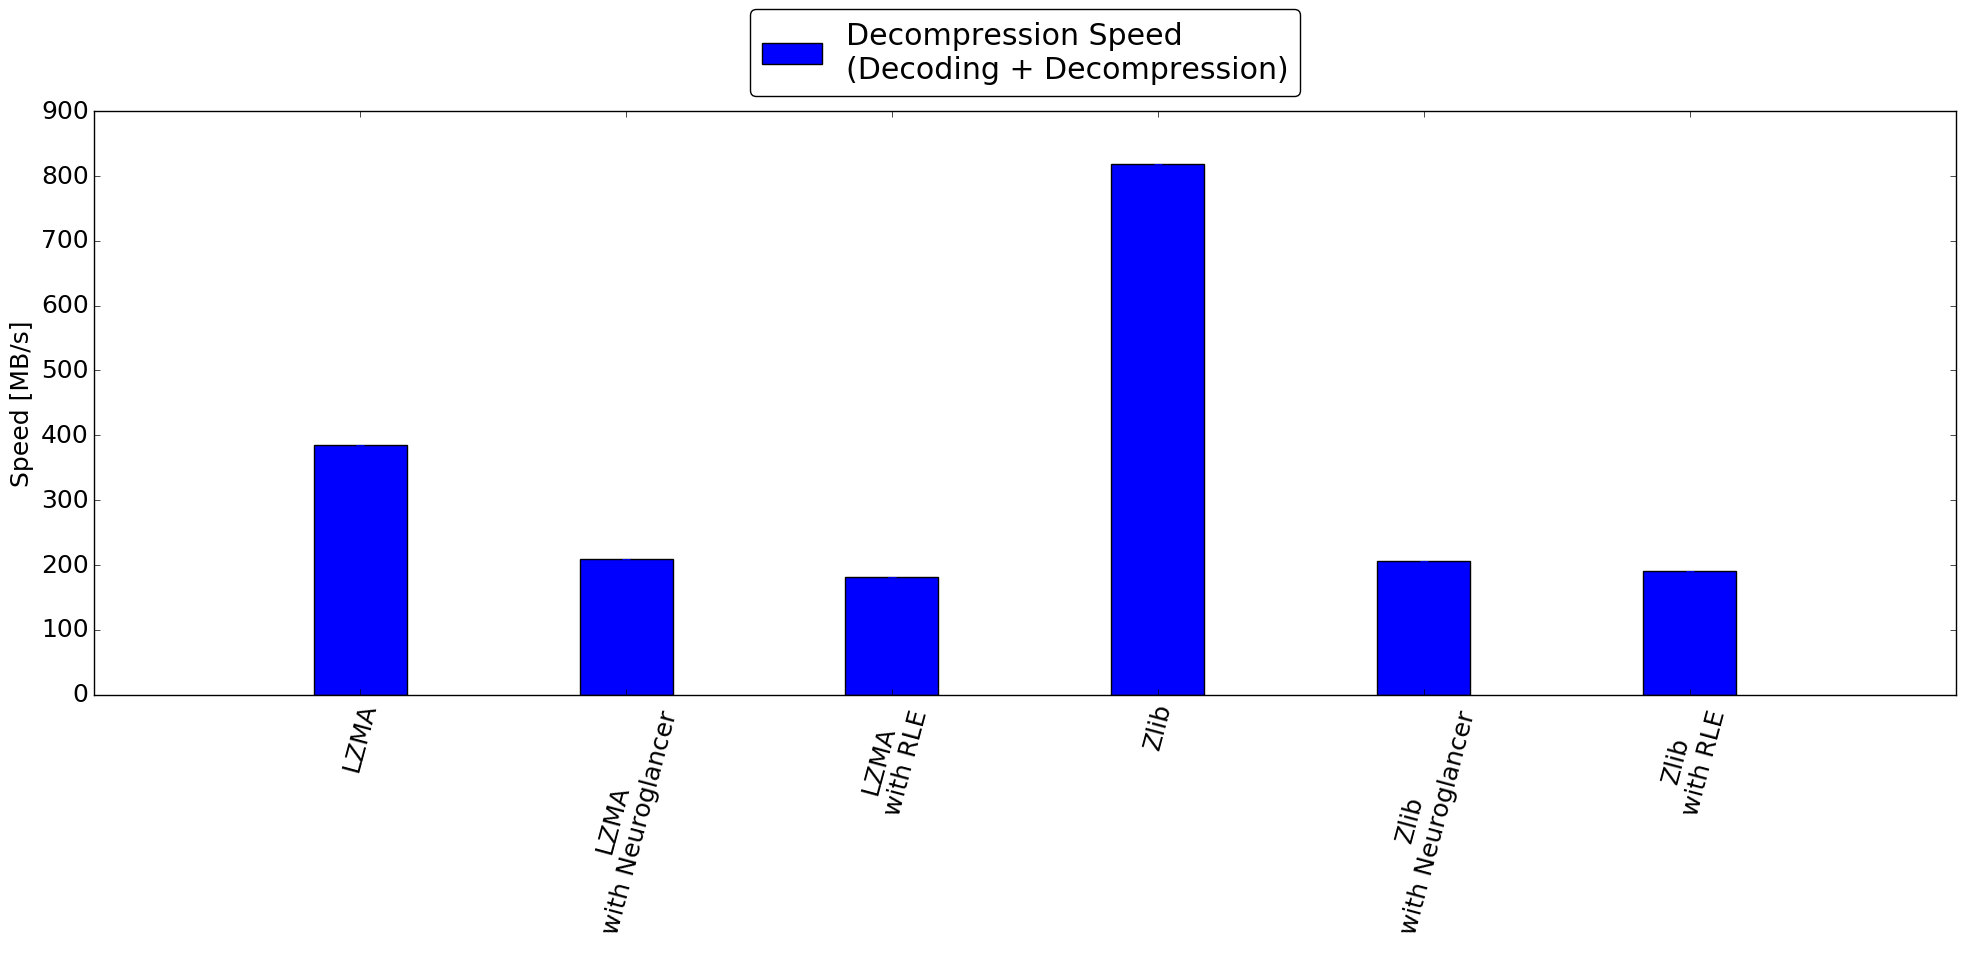

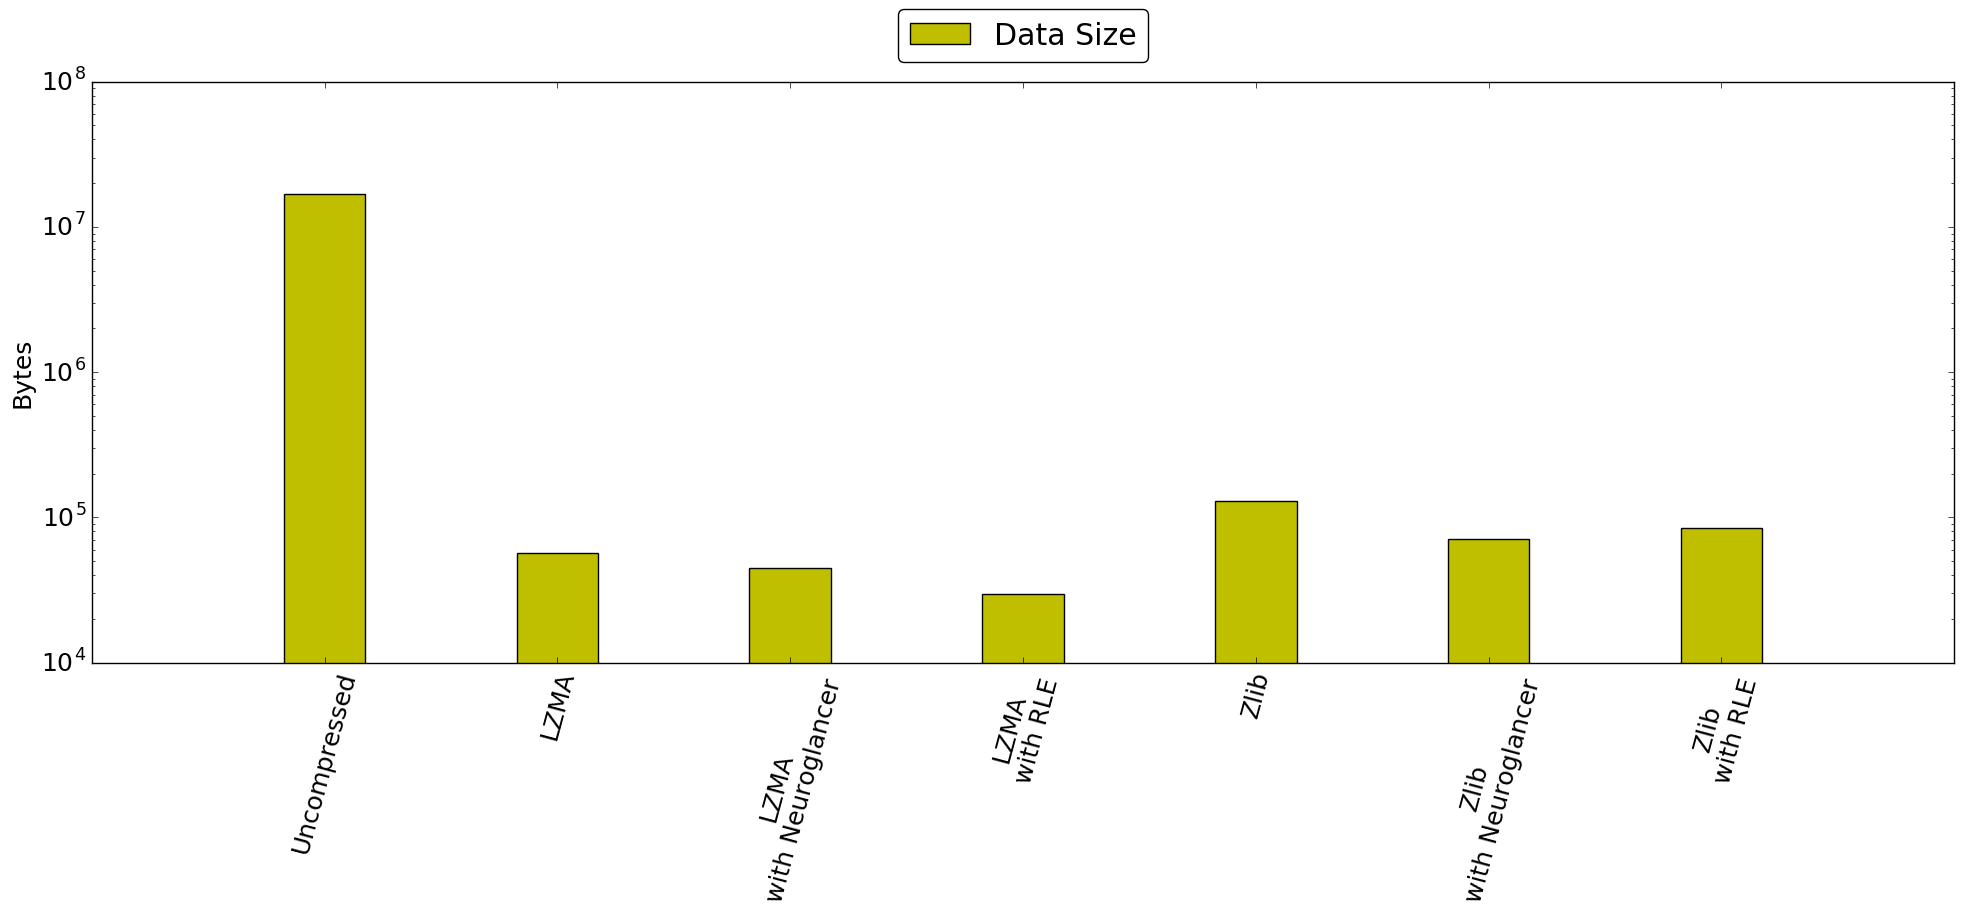

In [22]:
# PLOT: default

C.Util.plot(
    results_default['methods'],
    results_default['bytes'],
    results_default['ratios'],
    results_default['total_comp_speed'],
    results_default['total_comp_speed_std'],
    results_default['total_decomp_speed'],
    results_default['total_decomp_speed_std'],
    'ac3',
    bw=True
)

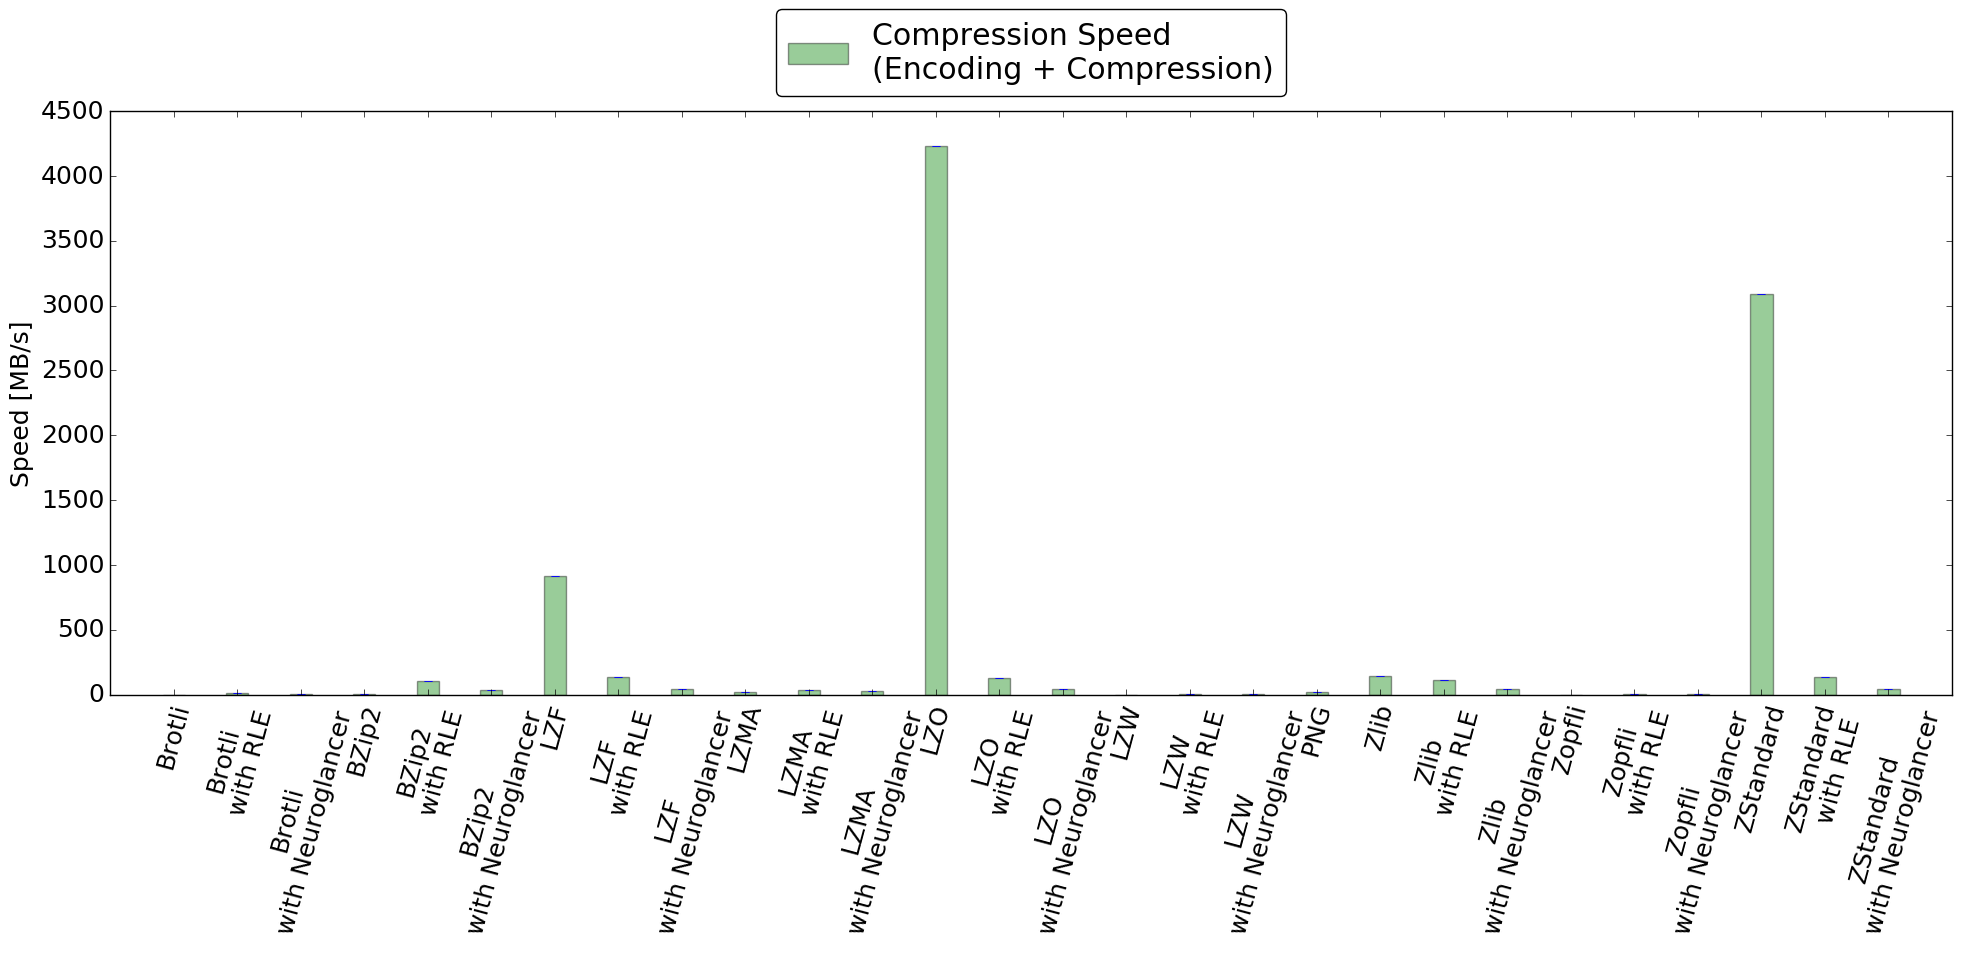

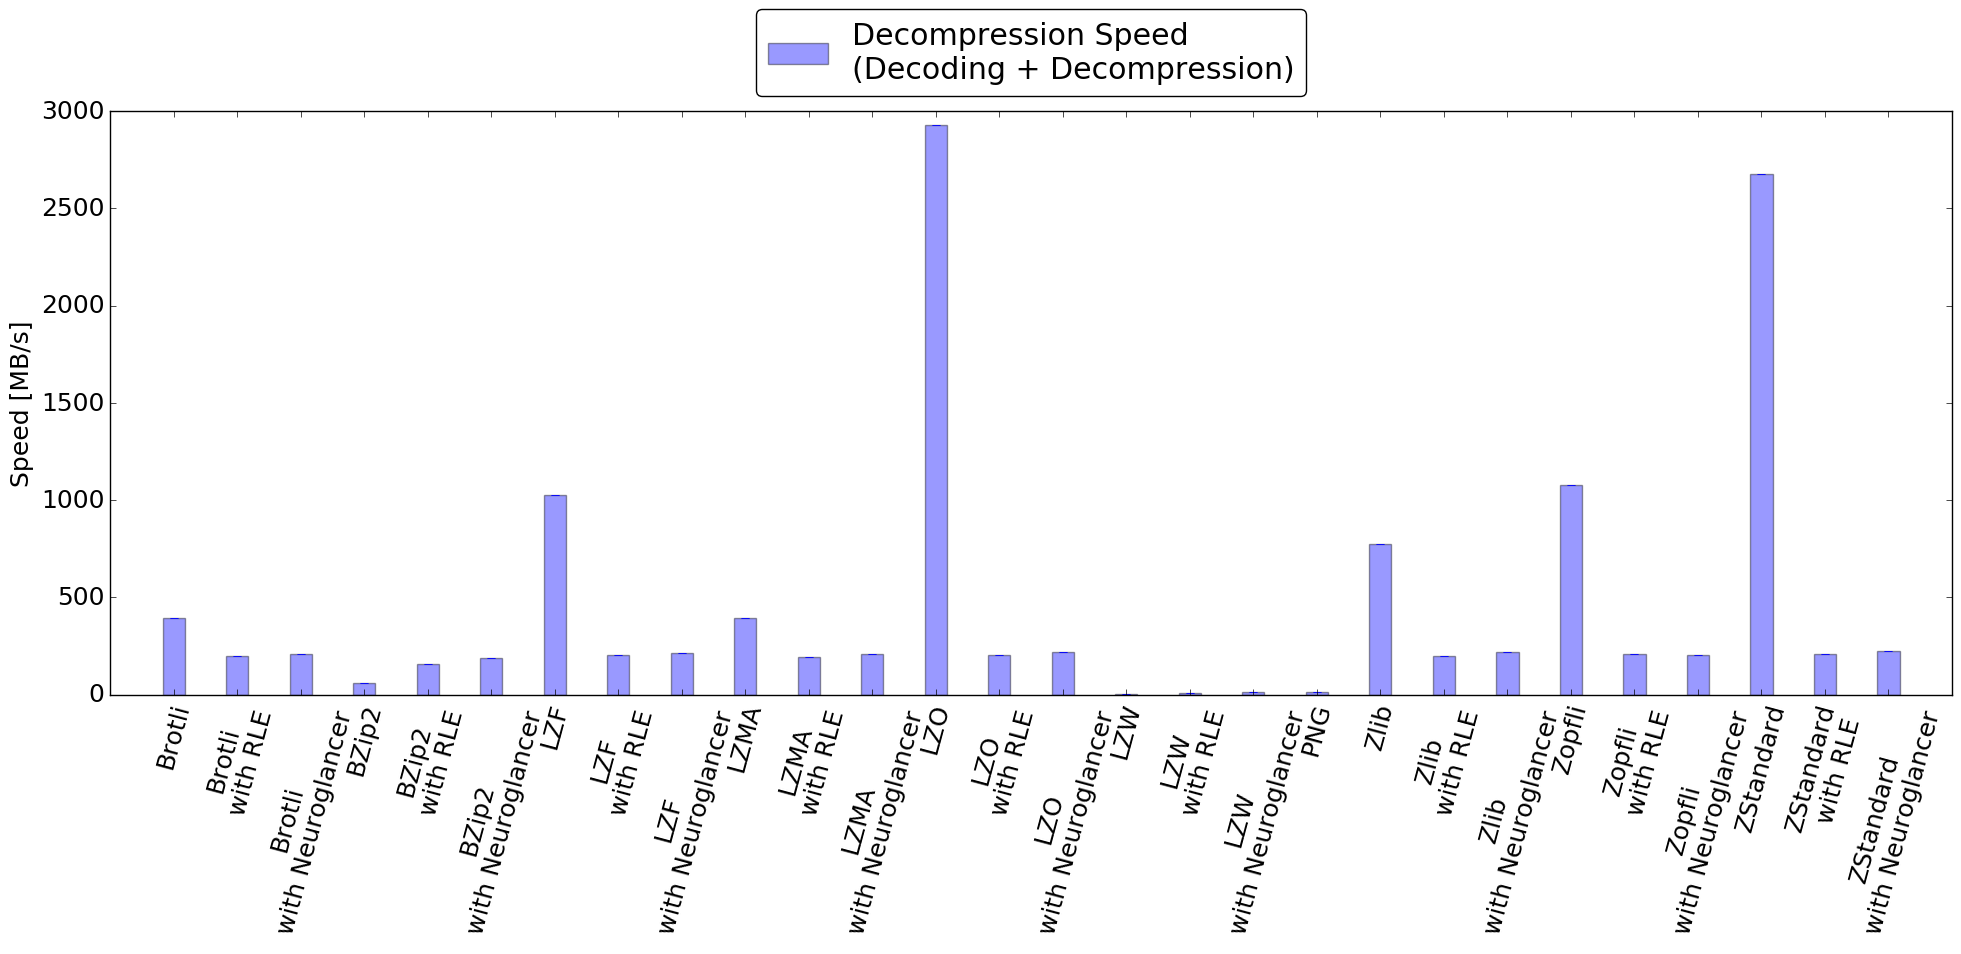

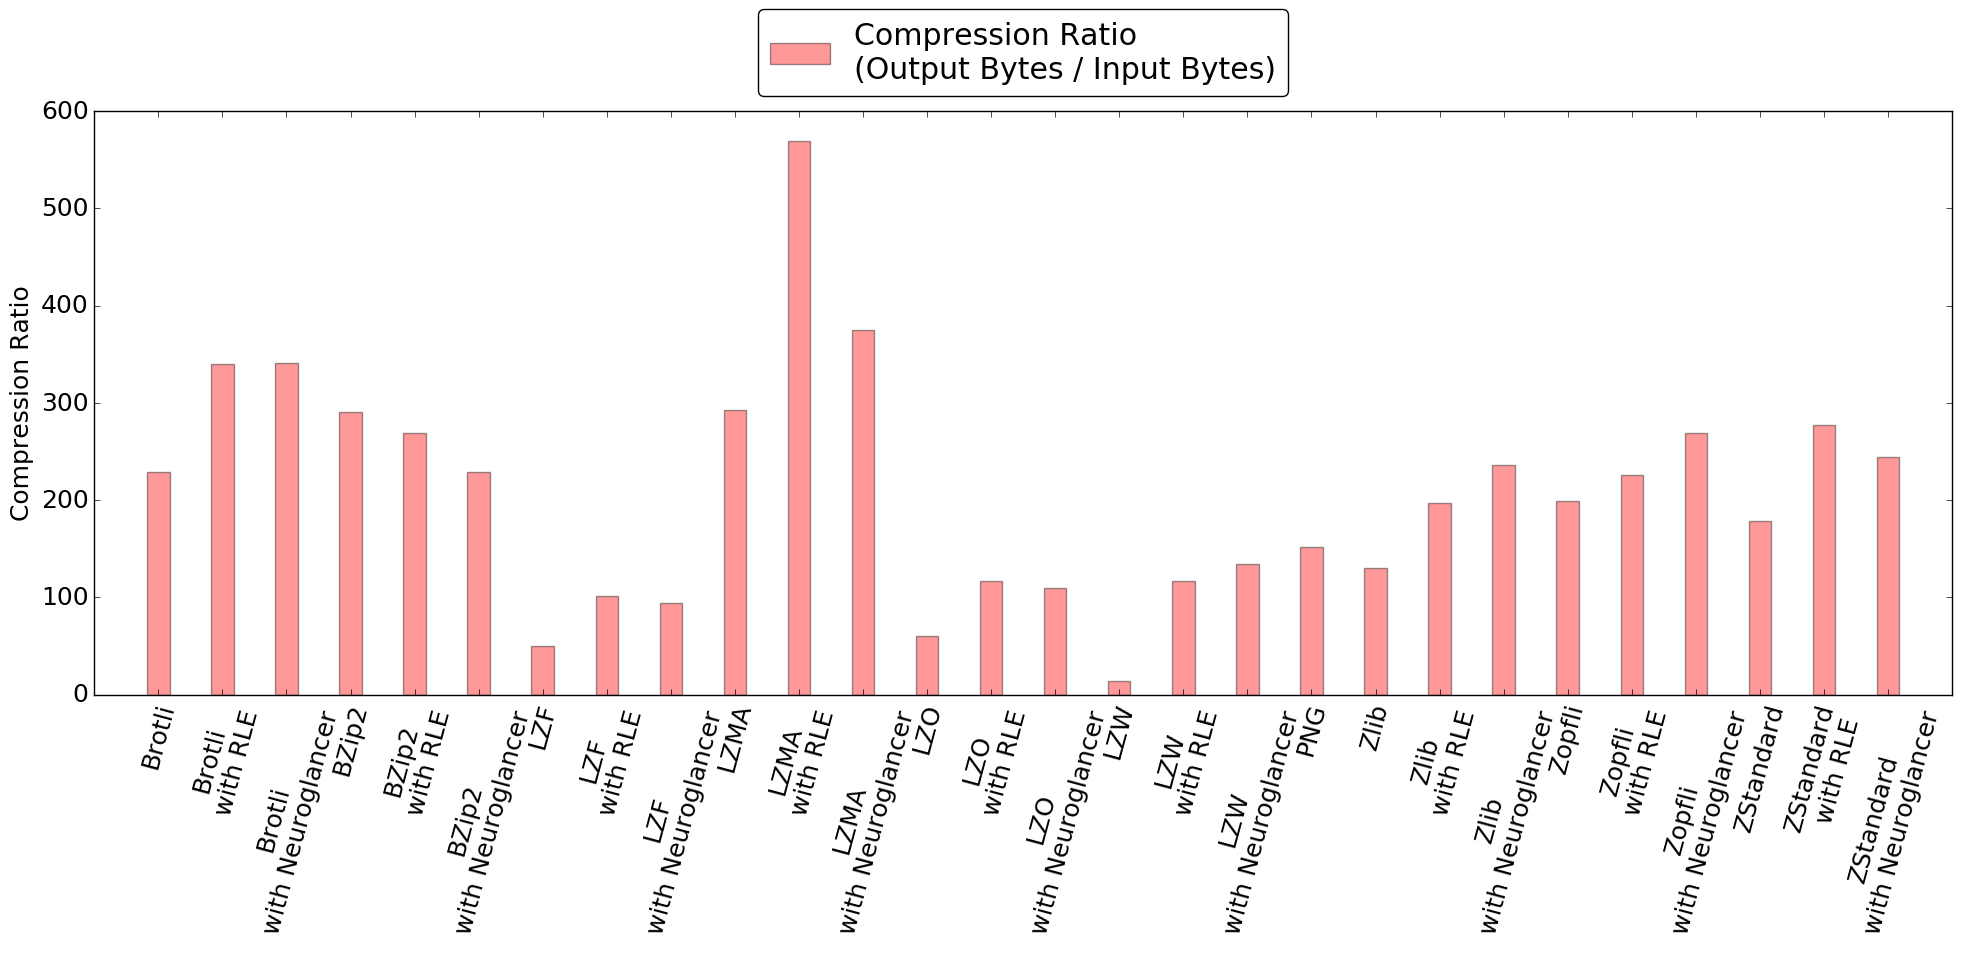

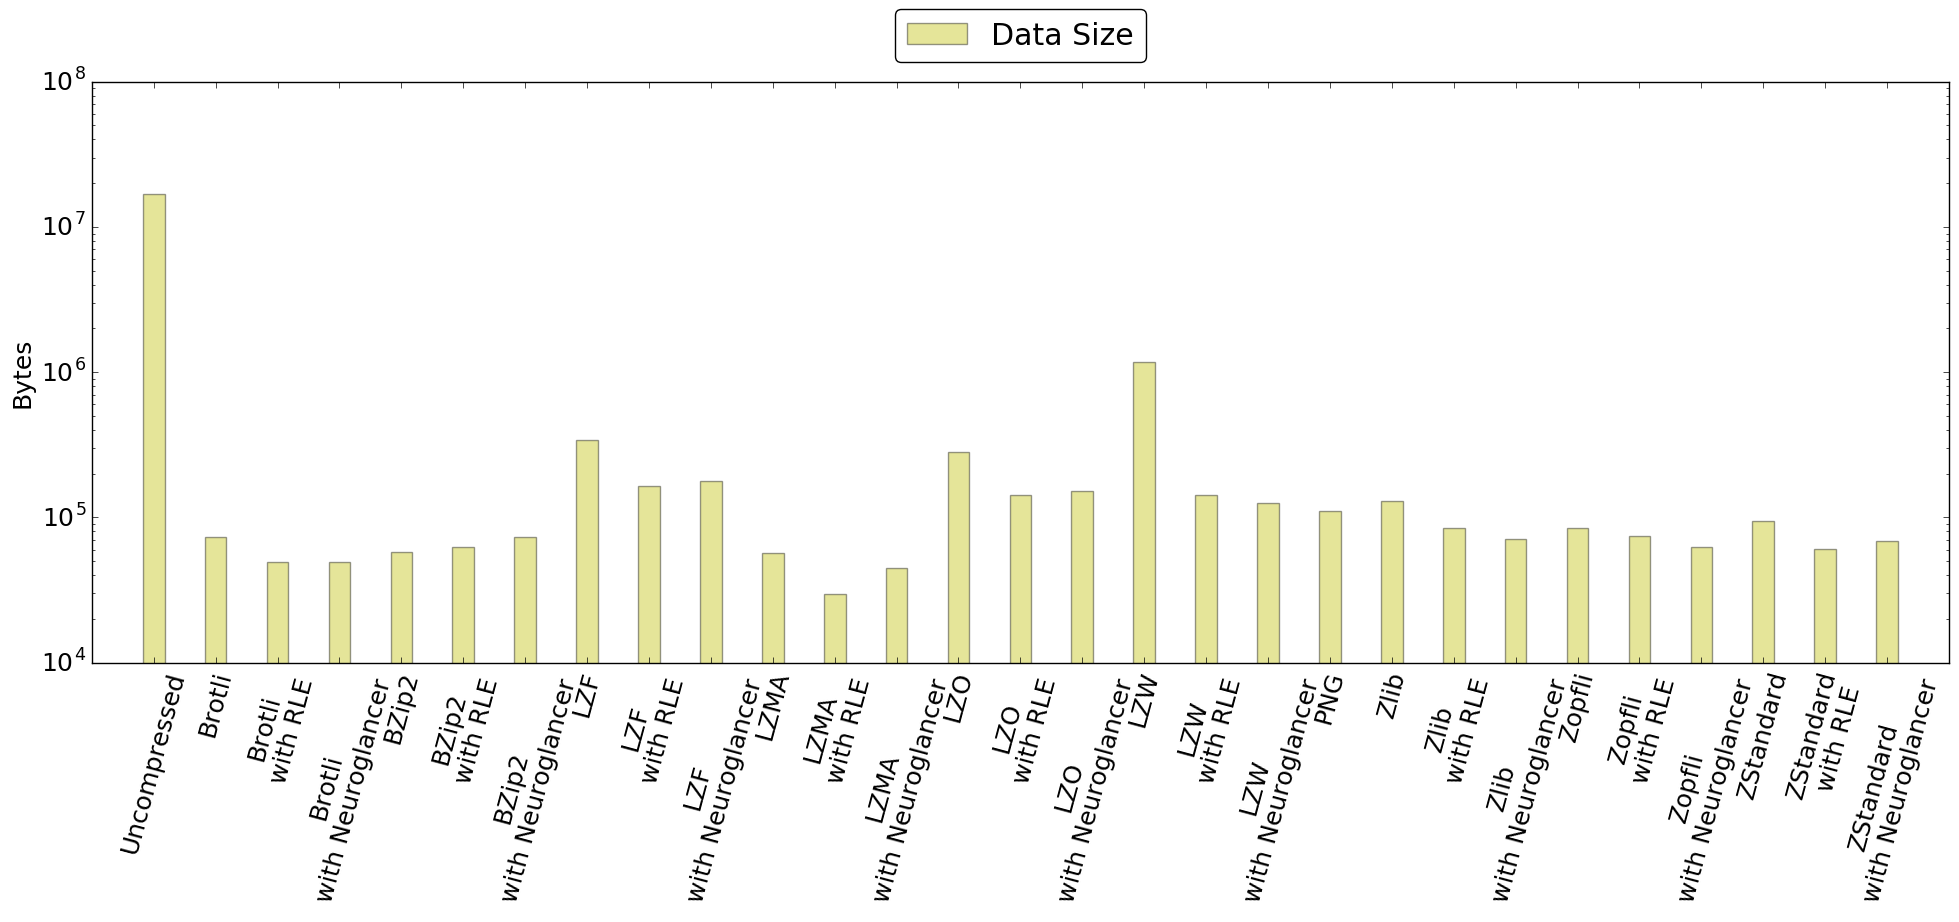

In [26]:
# PLOT: all

C.Util.plot(
    results_all['methods'],
    results_all['bytes'],
    results_all['ratios'],
    results_all['total_comp_speed'],
    results_all['total_comp_speed_std'],
    results_all['total_decomp_speed'],
    results_all['total_decomp_speed_std'],
    'ac3',
    bw=True
)

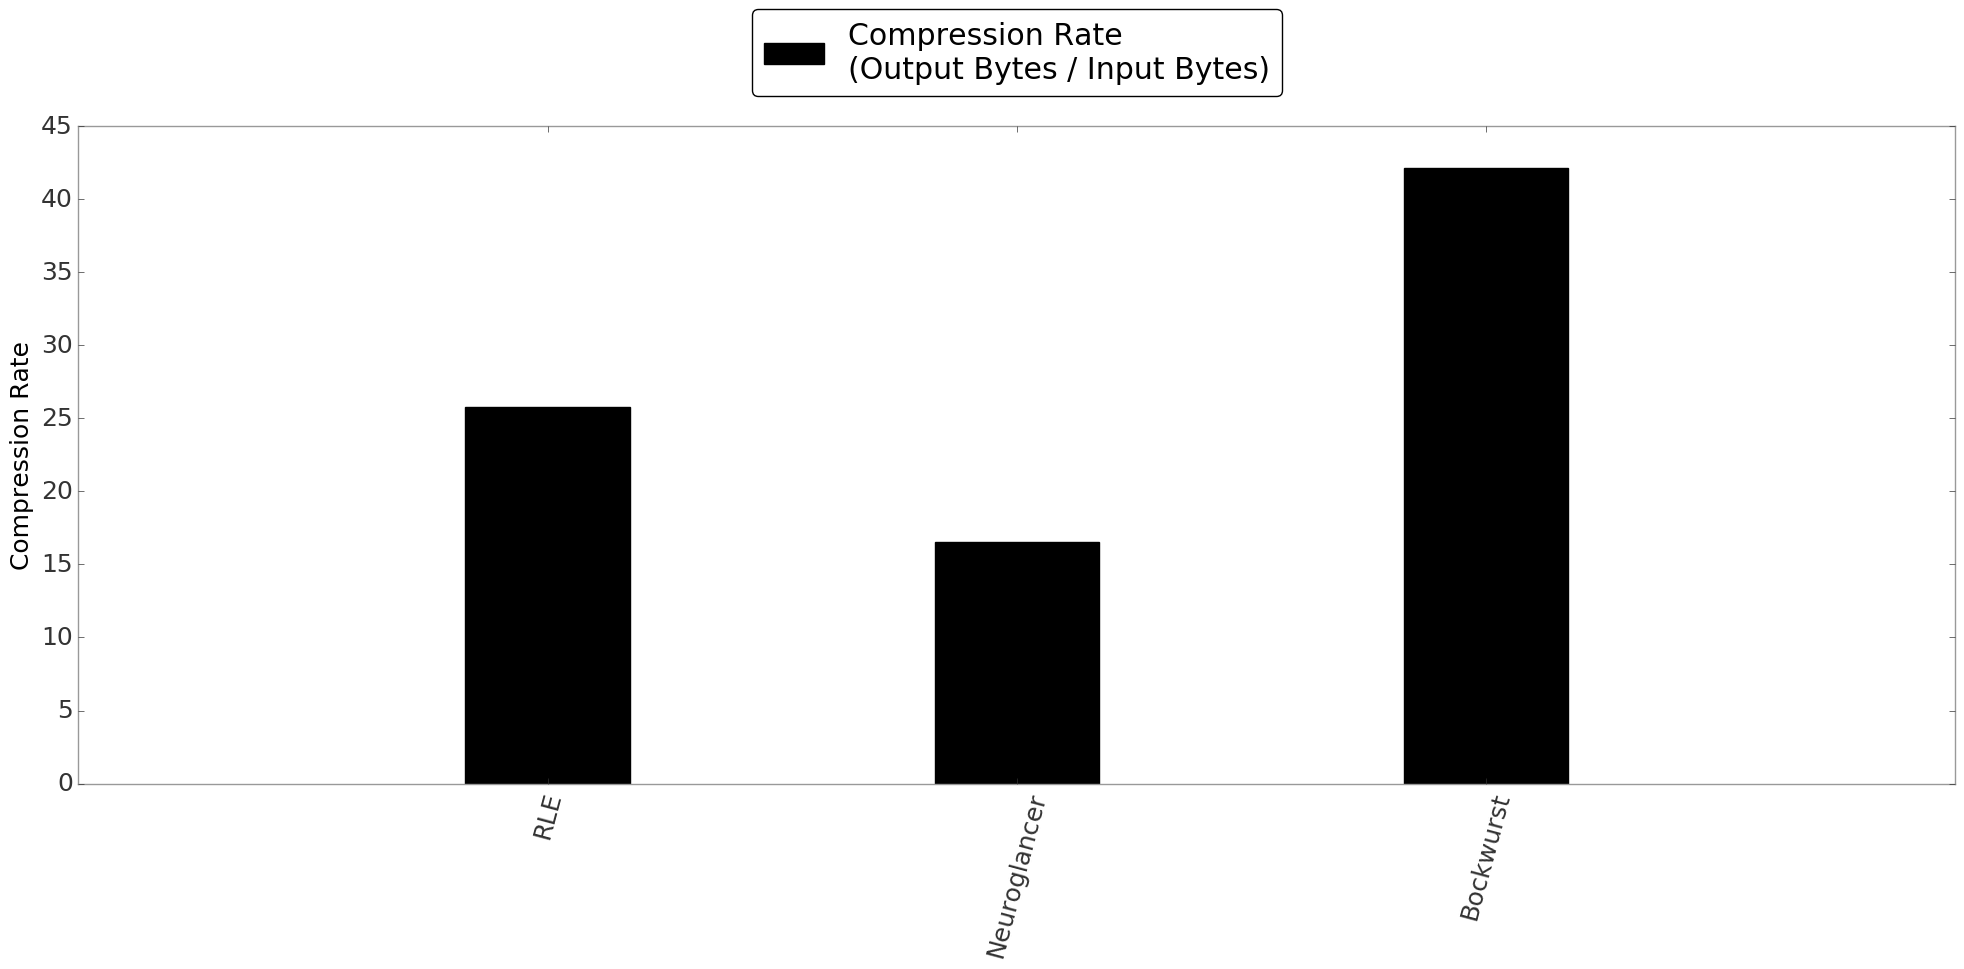

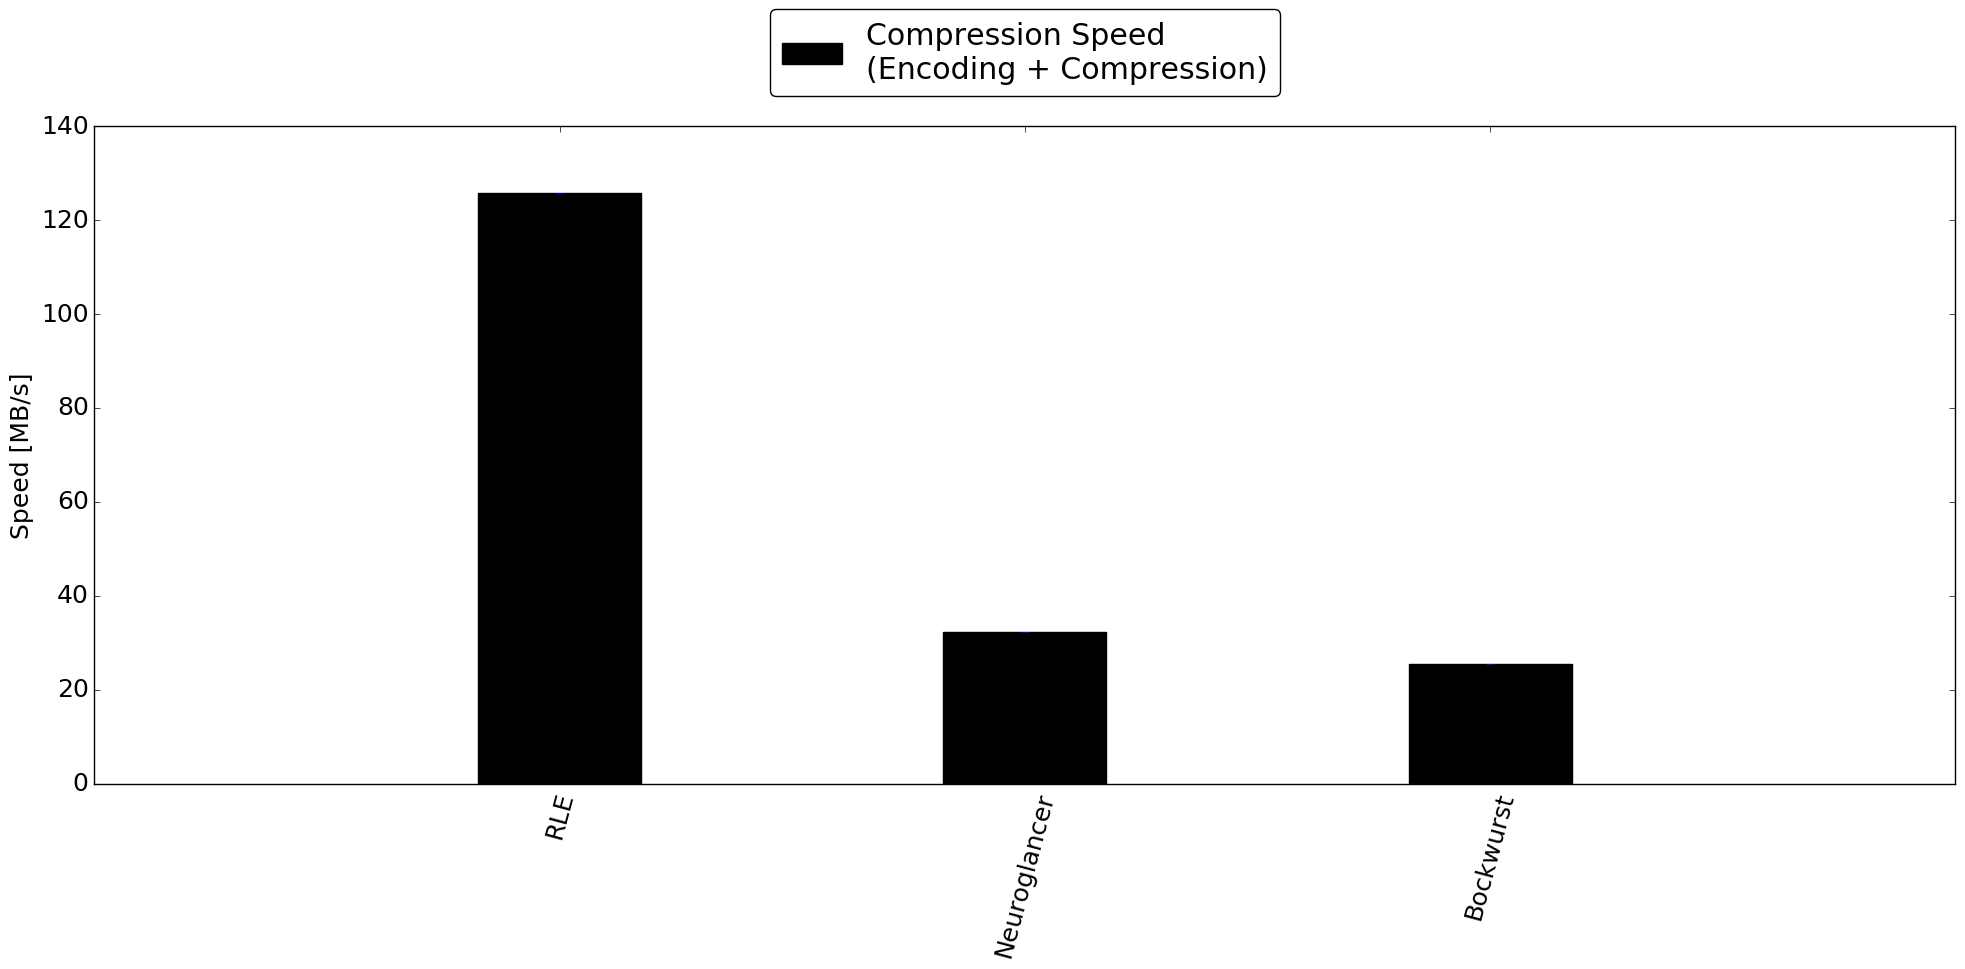

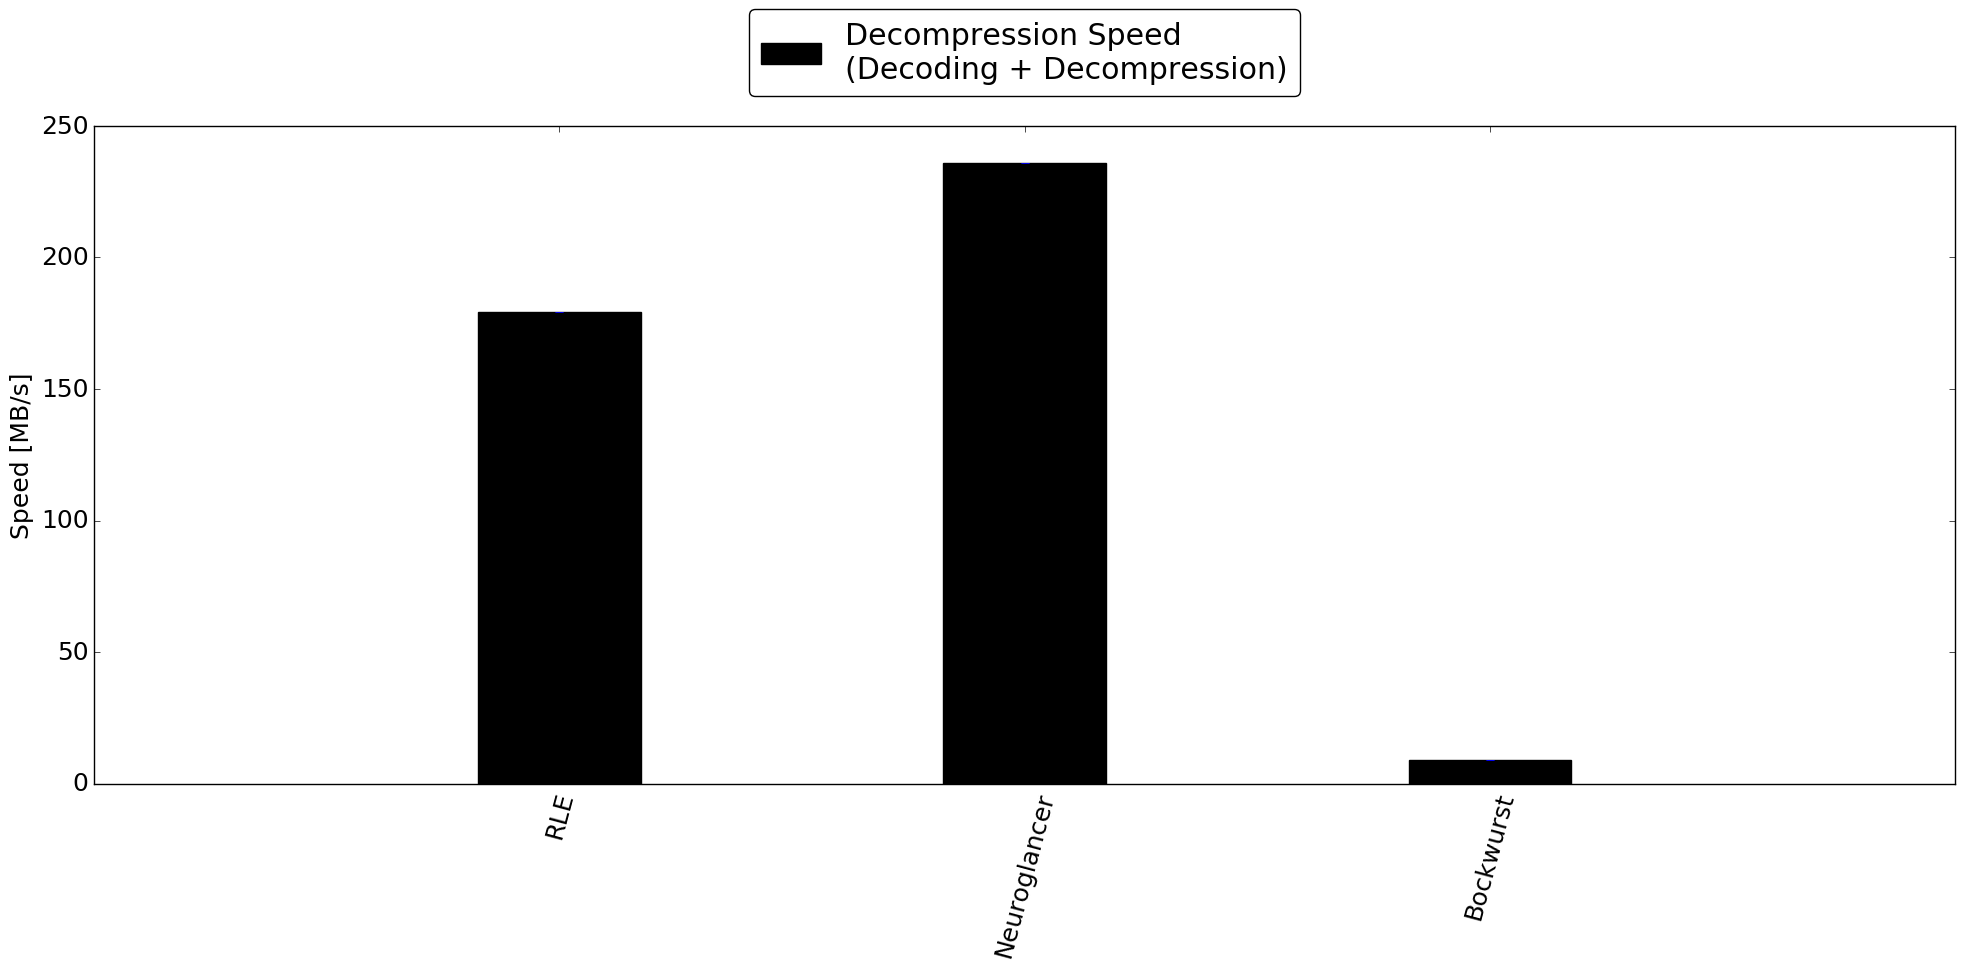

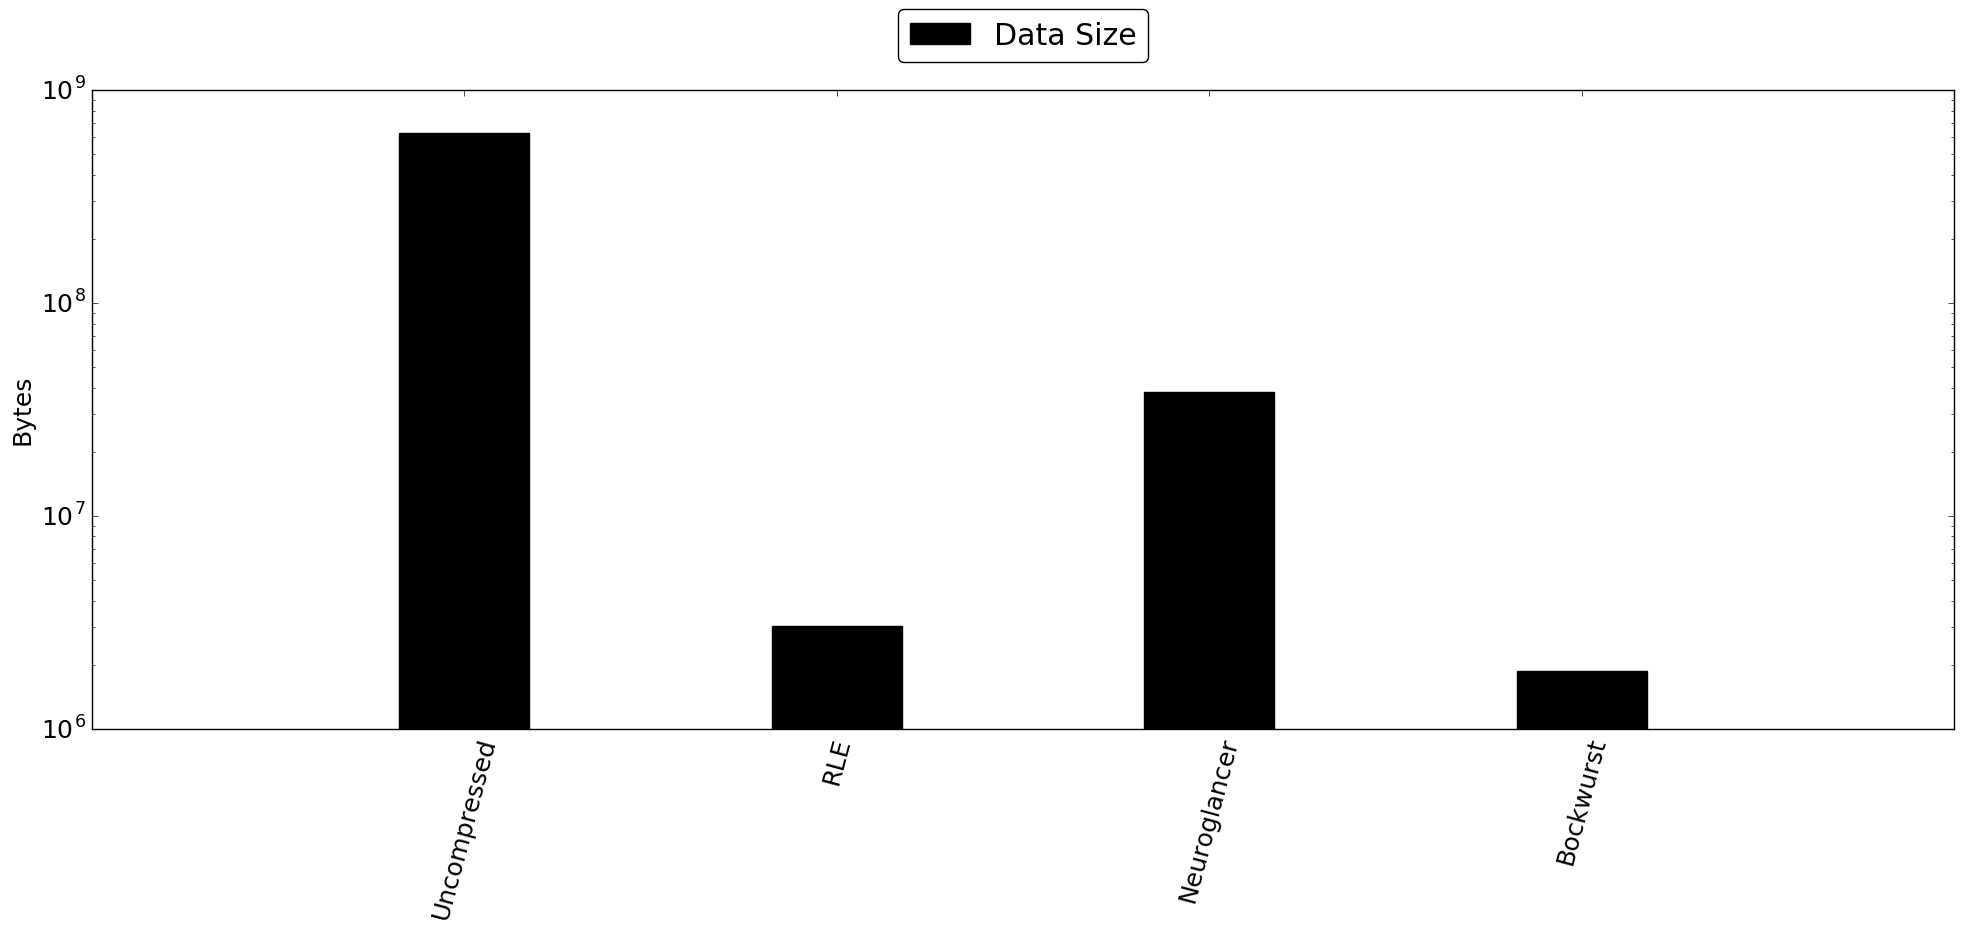

In [9]:
# Plot results

C.Util.plot(
    results_enc_only['methods'],
    results_enc_only['bytes'],
    results_enc_only['ratios'],
    results_enc_only['total_comp_speed'],
    results_enc_only['total_comp_speed_std'],
    results_enc_only['total_decomp_speed'],
    results_enc_only['total_decomp_speed_std'],
    'ac3',
    bw=True
)

In [7]:
import cPickle as pickle

In [8]:
with open('/home/d/data/ac3_results_all.p', 'wb') as f:
    pickle.dump(results_all, f)

In [11]:
with open('/home/d/data/ac3_results_def.p', 'wb') as f:
    pickle.dump(results_default, f)

In [10]:
with open('/home/d/data/ac3_results_enc_only.p', 'wb') as f:
    pickle.dump(results_enc_only, f)